# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Plotting

 - relplot()
 - scatterplot()
 - lineplot()

### 2. Categorical Data Plotting

 - catplot()
 - boxplot()
 - stripplot()
 - swarmplot()
 - etc...

### 3. Visualising Distribution of the Data

 - distplot()
 - kdeplot()
 - jointplot()
 - rugplot()

### 4. Linear Regression and Relationship

 - regplot()
 - lmplot()

### 5. Controlling Plotted Figure Aesthetics

 - figure stling 
 - axes styling
 - color palettes
 - etc...

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Numerical Data Plotting

In [5]:
sns.set(style = 'darkgrid')

In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.shape

(244, 7)

#### Plotting Relational Plot

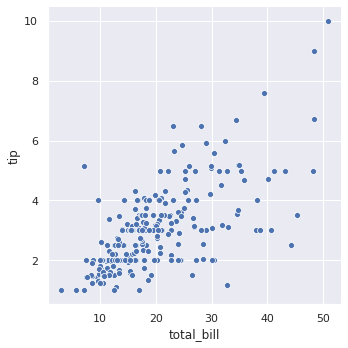

In [9]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

This plot by default outputs FacetGrid. By typing dir(sns.FacetGrid), we get all related methods

In [10]:
dir(sns.FacetGrid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_inner_axes',
 '_left_axes',
 '_legend_out',
 '_margin_titles',
 '_not_bottom_axes',
 '_not_left_axes',
 '_update_legend_data',
 'add_legend',
 'ax',
 'despine',
 'facet_axis',
 'facet_data',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels']

By setting hue and style, we can introduce 3rd and 4th parameter to plotting

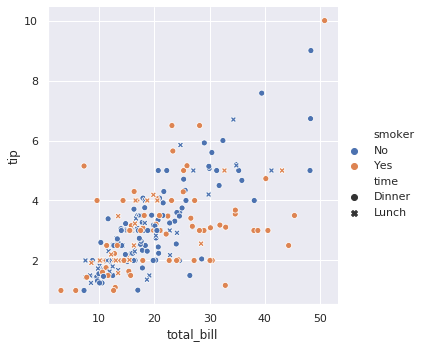

In [11]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')

In [12]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

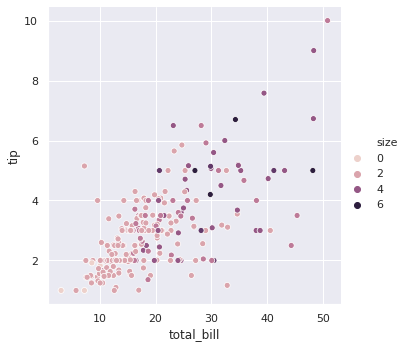

In [13]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'size')

Before the data entered into hue and style were categorical and here it is numerical data and hence we use qualitative palletts

 More over from the above plot we are able to infer that when the size of the family increases then tip is more

If we want to change that color from violet to something, do the following 

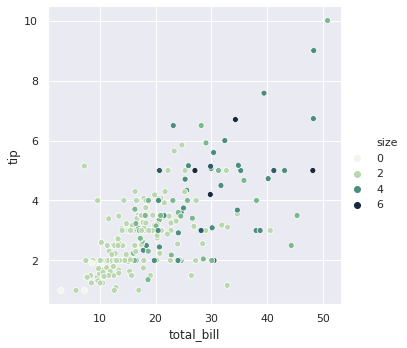

In [14]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips, palette = 'ch:r = -0.5, l = 0.95')

If we want to increase the size of the circles based on their corresponding values, 

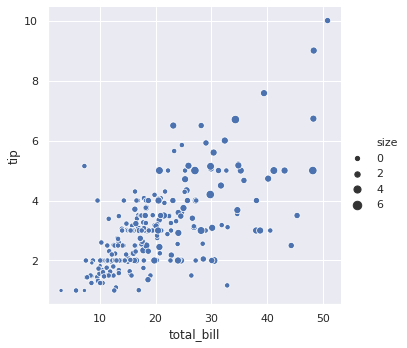

In [15]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

If we want to increase the sizes of these data points, we can provide a range of values between which the datapoints size will be normalized

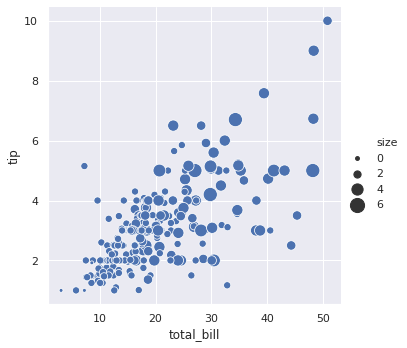

In [16]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size', sizes = (15,200))

#### Working with lineplot

 Here we are not going to use tips data rather a new dataset
 

In [17]:
from numpy.random import randn

In [41]:
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))

In [42]:
df.head()

,time,value
0,0,2.174712
1,1,2.627982
2,2,1.922289
3,3,3.488932
4,4,5.264714


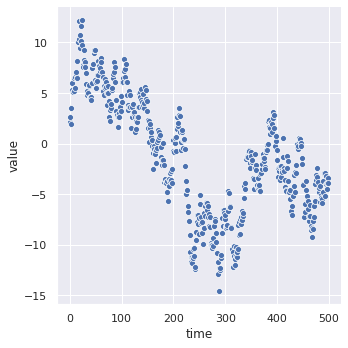

In [61]:
sns.relplot(data = df, x = 'time', y = 'value')            #This is ordinary relplot

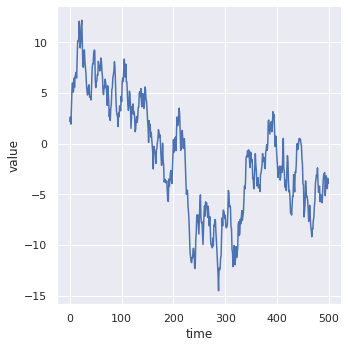

In [62]:
 sns.relplot(data = df, x = 'time', y = 'value', kind = 'line')

We have another parameter named sort which will not make any big difference in the above plot.
So we generate another dataframe

In [74]:
df = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time','value'])
df

,time,value
0,-0.131921,0.865575
1,-1.088209,0.852573
2,-1.048684,-0.411426
3,-1.988487,-0.735957
4,-4.486760,-0.724914
...,...,...
495,0.490982,10.126101
496,1.981108,10.269852
497,1.704861,10.407217
498,2.275653,10.920174


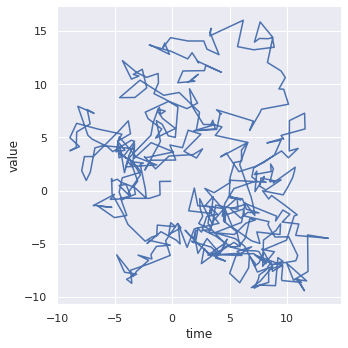

In [77]:
sns.relplot(data = df, x = 'time', y = 'value', kind = 'line', sort = False)

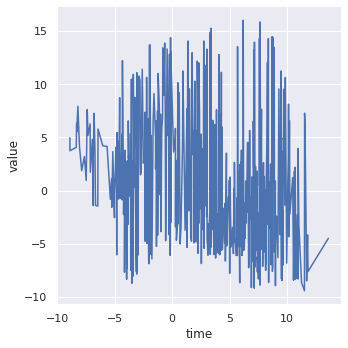

In [78]:
sns.relplot(data = df, x = 'time', y = 'value', kind = 'line', sort = True)

In [81]:
fmri = sns.load_dataset('fmri')

In [82]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


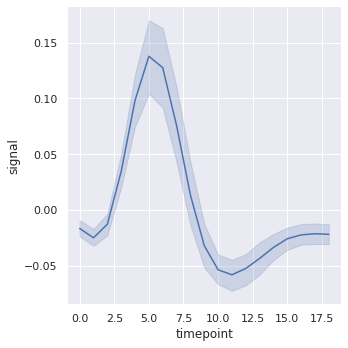

In [89]:
sns.relplot(x = 'timepoint', y = 'signal',data = fmri, kind = 'line')

The shaded region along the actual line is called confidence interval and that means for a particular value of x the value of y will definetly lie in the shaded part only. If we dont want that to be shown make ci = False

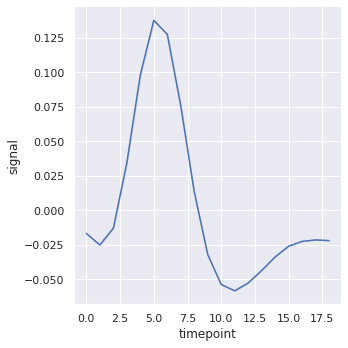

In [91]:
sns.relplot(x = 'timepoint', y = 'signal',data = fmri, kind = 'line', ci = False)

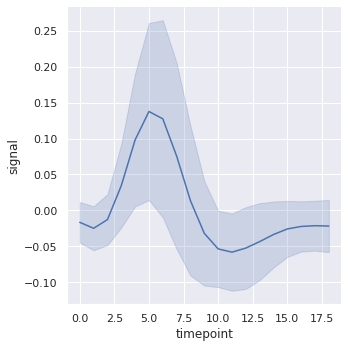

In [94]:
sns.relplot(x = 'timepoint', y = 'signal',data = fmri, kind = 'line', ci = 'sd')     # if we want that shaded region to be standard deviation

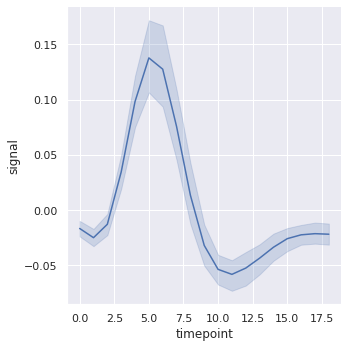

In [96]:
sns.relplot(data = fmri, x = 'timepoint', y = 'signal', kind = 'line')

Here we dont see any fluctuations in the data. even though we have data points which are fluctuating in real data. This is becz of estiamator being turned on. Try doing estimator = False

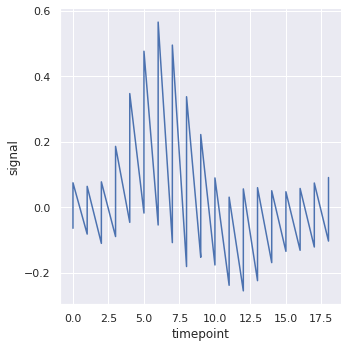

In [100]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line', estimator = None)

Lets go and do semantic mapping like we did in scatterplot where we had hue, size, style... the same way we can do

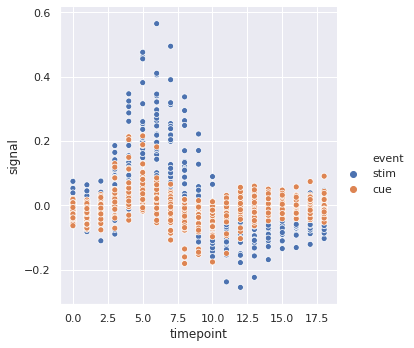

In [102]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri )

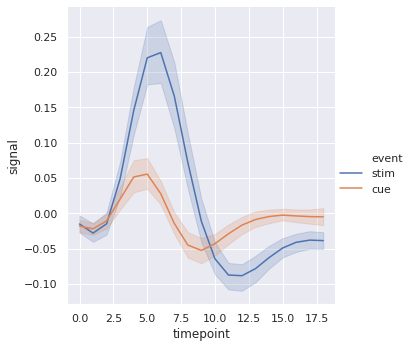

In [104]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event',kind = 'line', data = fmri )

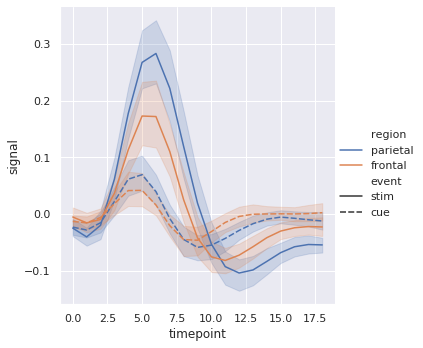

In [106]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', data = fmri, kind = 'line', style = 'event')

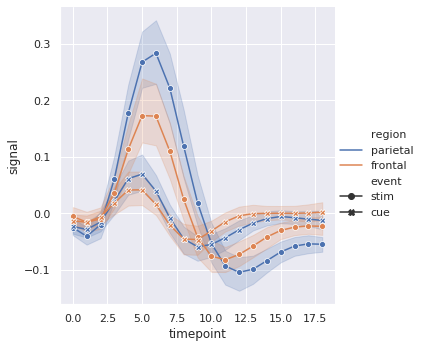

In [110]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', data = fmri, kind = 'line', style = 'event', markers = True, dashes = False)

If we add both hue and style, then we have both line and color change

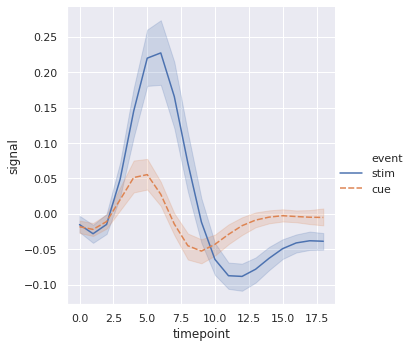

In [111]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri, kind = 'line', style = 'event')

If we have only hue, there is a color change

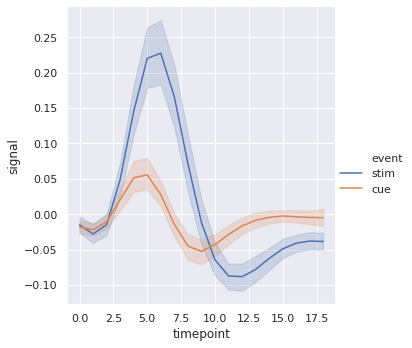

In [112]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri, kind = 'line')

With only style there is just a style change,

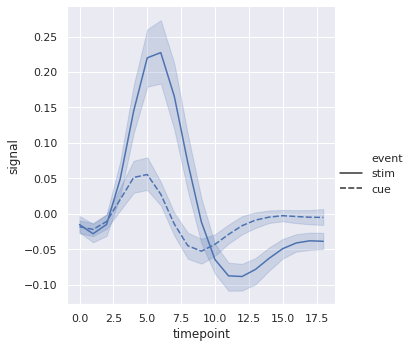

In [113]:
sns.relplot(x = 'timepoint', y = 'signal', style = 'event', data = fmri, kind = 'line')

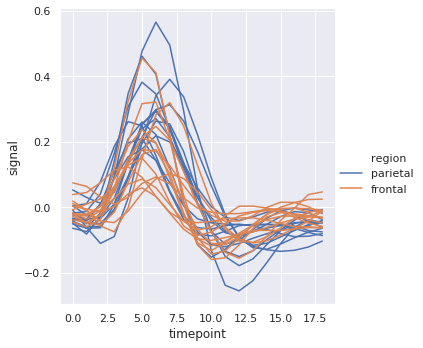

In [118]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', units = 'subject', data = fmri.query("event =='stim'"), kind = 'line', estimator = None)

To change something with colors, we use another dataset

In [121]:
dots = sns.load_dataset('dots').query("align == 'dots'")

In [122]:
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


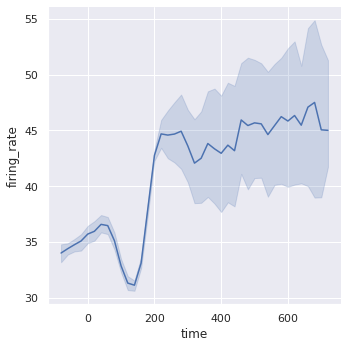

In [124]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line')

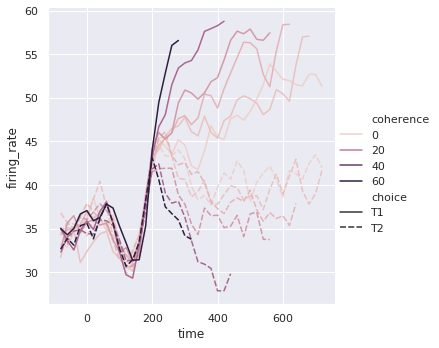

In [126]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice')

We can plot each line in coherence with seperate color like 4 different colors, we need to pass a dict for that

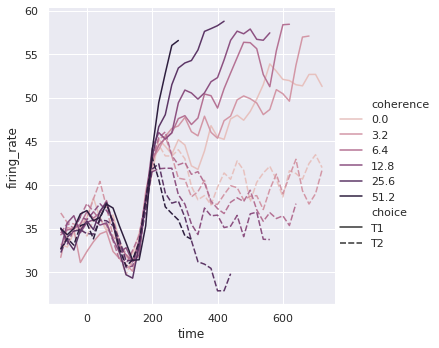

In [130]:
palette = sns.cubehelix_palette(light = 0.8, n_colors = 6)
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice', palette = palette)

To change the width of the lines based on intensity

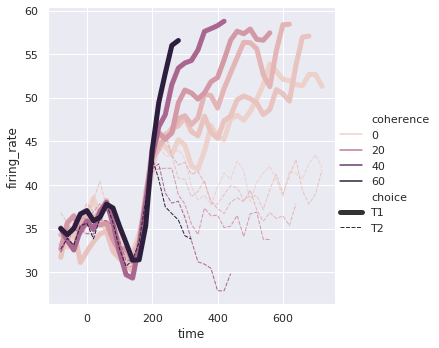

In [136]:
sns.relplot(x = 'time', y = 'firing_rate', hue = 'coherence', size = 'choice', style = 'choice', kind = 'line', data = dots, sizes= (1,5))

If we have date or tym values in our data,

In [137]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02',periods = 500), value = randn(500).cumsum()))

In [138]:
df.head()

,time,value
0,2019-06-02,-0.154505
1,2019-06-03,-0.182464
2,2019-06-04,-0.652918
3,2019-06-05,0.818988
4,2019-06-06,1.415469


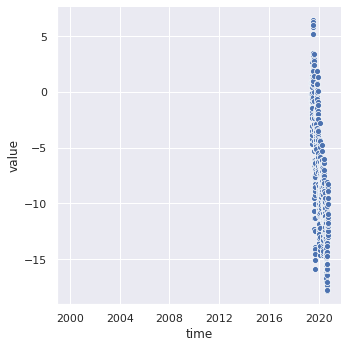

In [139]:
sns.relplot(x = 'time', y = 'value', data = df)

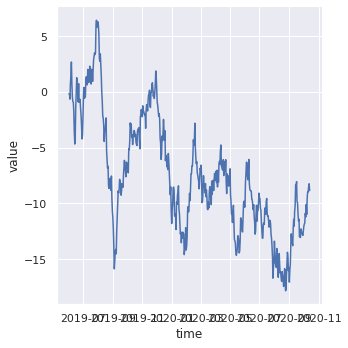

In [140]:
sns.relplot(x = 'time', y = 'value', data = df, kind = 'line')

The tym is mixed up and hence the data is not shown clearly

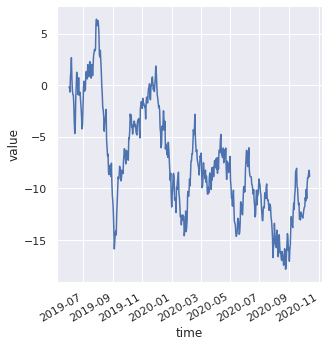

In [143]:
g = sns.relplot(x = 'time', y = 'value', data = df, kind = 'line')
g.fig.autofmt_xdate()